<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from category_encoders import CountEncoder

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [82]:
data = pd.read_csv("game_of_thrones_train.csv", index_col="S.No")# Download data from notebook

print(data.head(10))

                      name                 title  male   culture  dateOfBirth  \
S.No                                                                            
1     Viserys II Targaryen                   NaN     1       NaN          NaN   
2              Walder Frey  Lord of the Crossing     1  Rivermen        208.0   
3             Addison Hill                   Ser     1       NaN          NaN   
4              Aemma Arryn                 Queen     0       NaN         82.0   
5           Sylva Santagar            Greenstone     0   Dornish        276.0   
6         Tommen Baratheon                   NaN     1       NaN          NaN   
7         Valarr Targaryen      Hand of the King     1  Valyrian        183.0   
8      Viserys I Targaryen                   NaN     1       NaN          NaN   
9                  Wilbert                   Ser     1       NaN          NaN   
10          Wilbert Osgrey                   Ser     1       NaN          NaN   

                  mother   

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [83]:
print(data.columns)
columns_to_display = ['dateOfBirth', 'isAliveHeir', 'isAliveSpouse']
print(data[columns_to_display].head(15))

Index(['name', 'title', 'male', 'culture', 'dateOfBirth', 'mother', 'father',
       'heir', 'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity',
       'isAlive'],
      dtype='object')
      dateOfBirth  isAliveHeir  isAliveSpouse
S.No                                         
1             NaN          0.0            NaN
2           208.0          NaN            1.0
3             NaN          NaN            NaN
4            82.0          NaN            0.0
5           276.0          NaN            1.0
6             NaN          1.0            NaN
7           183.0          NaN            1.0
8             NaN          1.0            NaN
9             NaN          NaN            NaN
10            NaN          NaN            NaN
11            NaN          NaN            NaN
12            NaN          NaN            NaN
13           

In [84]:
nan_counts = data.isna().sum()
print(nan_counts)

name                   0
title                840
male                   0
culture             1069
dateOfBirth         1278
mother              1539
father              1535
heir                1536
house                381
spouse              1357
book1                  0
book2                  0
book3                  0
book4                  0
book5                  0
isAliveMother       1539
isAliveFather       1535
isAliveHeir         1536
isAliveSpouse       1357
isMarried              0
isNoble                0
age                 1278
numDeadRelations       0
popularity             0
isAlive                0
dtype: int64


In [ ]:
def clean_data(df):
    
    df = df.dropna(subset=['isAlive'])
    
    df['title'] = df['title'].fillna('No')
    df['culture'] = df['culture'].fillna('No')
    df['mother'] = df['mother'].fillna('No')
    df['father'] = df['father'].fillna('No')
    df['heir'] = df['heir'].fillna('No')
    df['house'] = df['house'].fillna('No')
    # df['age'] = df['age'].fillna('mother')
    df['spouse'] = df['spouse'].fillna('spouse')
    df['isAliveHeir'] = df['isAliveHeir'].fillna(-1)
    df['isAliveSpouse'] = df['isAliveSpouse'].fillna(-1)

    df['isAliveFather'] = df['isAliveFather'].fillna(df['isAliveFather'].median())
    df['isAliveMother'] = df['isAliveMother'].fillna(df['isAliveMother'].median())
    df['age'] = df['age'].fillna(df['age'].median())
    df['dateOfBirth'] = df['dateOfBirth'].fillna(df['dateOfBirth'].median())

    return df
data = clean_data(data)
nan_counts = data.isna().sum()
print(nan_counts)

name                0
title               0
male                0
culture             0
dateOfBirth         0
mother              0
father              0
heir                0
house               0
spouse              0
book1               0
book2               0
book3               0
book4               0
book5               0
isAliveMother       0
isAliveFather       0
isAliveHeir         0
isAliveSpouse       0
isMarried           0
isNoble             0
age                 0
numDeadRelations    0
popularity          0
isAlive             0
dtype: int64


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [86]:
print(data[['popularity', 'culture']].head(10))

      popularity   culture
S.No                      
1       0.605351        No
2       0.896321  Rivermen
3       0.267559        No
4       0.183946        No
5       0.043478   Dornish
6       1.000000        No
7       0.431438  Valyrian
8       0.678930        No
9       0.006689        No
10      0.020067        No


In [87]:
unique_values = data['culture'].value_counts()
# print(unique_values)

unique_values_df = unique_values.reset_index()
unique_values_df.columns = ['Value', 'Count']
print(unique_values_df)

                      Value  Count
0                        No   1069
1                  Northmen     94
2                  Ironborn     91
3                 Free Folk     45
4                  Braavosi     39
5                  Valyrian     28
6                  Ghiscari     17
7                   Dornish     17
8                  Dothraki     17
9                     Reach     13
10      Vale mountain clans     12
11                 Rivermen     10
12                  Valemen     10
13                 northmen      9
14                Westerman      8
15                Free folk      7
16                  Tyroshi      6
17                 Qartheen      5
18               Stormlands      4
19             Summer Isles      4
20                 Astapori      4
21                 Westeros      3
22               Dornishmen      3
23                  Ironmen      3
24  Northern mountain clans      3
25                Westermen      3
26                   Lysene      2
27                we

In [88]:
data['isPopular'] = data['popularity'].apply(lambda x: 1 if x > 0.6 else 0)
data['numDeadRelations'] = data['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)

print(data[['isPopular', 'numDeadRelations']])
data.drop('popularity', axis=1, inplace=True)

      isPopular  numDeadRelations
S.No                             
1             1                 1
2             1                 1
3             0                 0
4             0                 0
5             0                 0
...         ...               ...
1553          0                 0
1554          0                 0
1555          0                 0
1556          0                 0
1557          0                 0

[1557 rows x 2 columns]


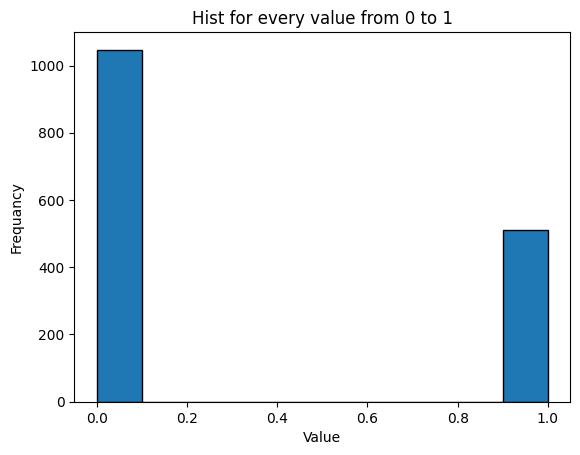

In [89]:
len(data['book1'])

X = np.array(data['book2'])

plt.hist(X, bins=np.arange(0, 1.1, 0.1), edgecolor='black')

plt.title('Hist for every value from 0 to 1')
plt.xlabel('Value')
plt.ylabel('Frequancy')

# Отображение графика
plt.show()

In [90]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

data['culture'] = data['culture'].apply(lambda x: cult.get(x, 'No'))


unique_values = data['culture'].value_counts()
# print(unique_values)

unique_values_df = unique_values.reset_index()
unique_values_df.columns = ['Value', 'Count']
print(unique_values_df)

                                              Value  Count
0                                                No   1317
1                             [the north, northmen]     94
2                  [wildling, first men, free folk]     45
3                               [braavosi, braavos]     39
4                      [dornishmen, dorne, dornish]     17
5                    [ghiscari, ghiscaricari, ghis]     17
6                      [the reach, reach, reachmen]     13
7                                 [qartheen, qarth]      5
8               [westermen, westerman, westerlands]      3
9                                  [lysene, lyseni]      2
10                            [myr, myrish, myrmen]      2
11                               [norvos, norvoshi]      1
12                                  [andal, andals]      1
13  [summer islands, summer islander, summer isles]      1


<h3>Encoder for data</h3>

In [ ]:
# label_encoder = LabelEncoder()

'''
for col in data.columns:
    if data[col].apply(lambda x: isinstance(x, list)).any():
        # data[col] = data[col].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
        data[col] = label_encoder.fit_transform(data[col])
'''
for col in data.columns:
    # Преобразуем все элементы в строки
    data[col] = data[col].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
    # Применяем Label Encoding
    data[col] = label_encoder.fit_transform(data[col])

print(data)
# Применение pd.get_dummies()
# data = pd.get_dummies(data, columns=data.select_dtypes(include=['object']).columns)

# print(data)

      name  title  male  culture  dateOfBirth  mother  father  heir  house  \
S.No                                                                         
1     1457    135     1        0           79      11       8     0    302   
2     1469    115     1        0           42      16      19    15    106   
3        5    164     1        0           79      16      19    15    244   
4       18    146     0        0            8      16      19    15     21   
5     1338     53     0        3           81      16      19    15    219   
...    ...    ...   ...      ...          ...     ...     ...   ...    ...   
1553   927      1     1        0           79      16      19    15    302   
1554   930    135     0        0           79      16      19    15    302   
1555   938    135     1        0           79      16      19    15    222   
1556   947    135     0        0           88      16      19    15    207   
1557   954    135     0        0           72      16      19   

In [92]:
target_column = 'isAlive'

# Вычисление корреляции каждого столбца с целевым столбцом
correlations = data.corr()[target_column].drop(target_column)

'''
# Построение гистограммы распределения корреляций
plt.figure(figsize=(10, 6))
plt.hist(correlations, bins=20, range=(-1, 1), edgecolor='black')
plt.title(f'Distribution of Correlations with {target_column}')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Frequency')
plt.xlim(-1, 1)  # Устанавливаем пределы оси x от -1 до 1
plt.show() 
'''
# print(correlations.dtype)

"\n# Построение гистограммы распределения корреляций\nplt.figure(figsize=(10, 6))\nplt.hist(correlations, bins=20, range=(-1, 1), edgecolor='black')\nplt.title(f'Distribution of Correlations with {target_column}')\nplt.xlabel('Correlation Coefficient')\nplt.ylabel('Frequency')\nplt.xlim(-1, 1)  # Устанавливаем пределы оси x от -1 до 1\nplt.show() \n"

In [93]:
good_cor = []
cols = data.columns
print(cols)
'''
for i in range(len(cols)):
    if((correlations[i] > 0.1) or (correlations[i] < -0.1)):
        good_cor.append(cols[i])
print(good_cor)
'''

Index(['name', 'title', 'male', 'culture', 'dateOfBirth', 'mother', 'father',
       'heir', 'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'isAlive',
       'isPopular'],
      dtype='object')


'\nfor i in range(len(cols)):\n    if((correlations[i] > 0.1) or (correlations[i] < -0.1)):\n        good_cor.append(cols[i])\nprint(good_cor)\n'

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

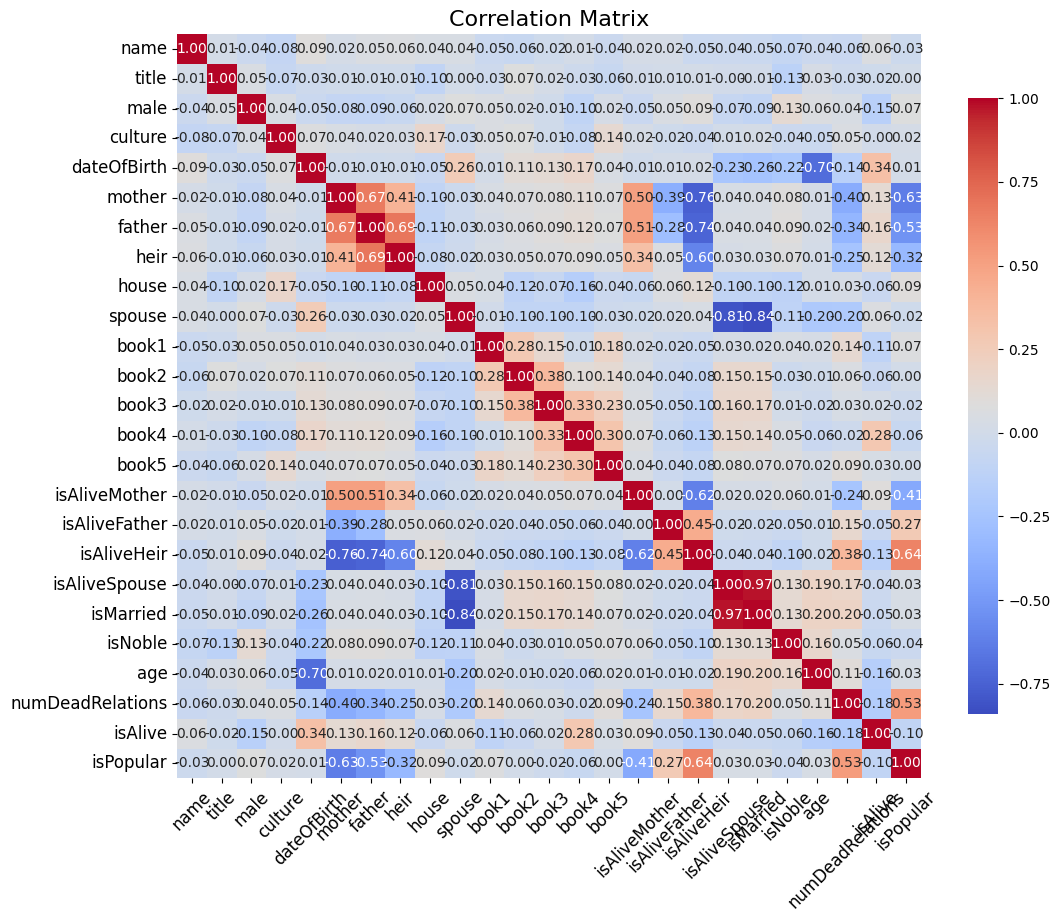

In [94]:
corr_df = data.corr()

plt.figure(figsize=(12, 10))  # Увеличиваем размер графика
sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt=".2f", square=True,
            cbar_kws={'shrink': .8}, annot_kws={"size": 10})  # Увеличиваем размер шрифта аннотаций

plt.xticks(fontsize=12, rotation=45)  # Увеличиваем размер шрифта осей и поворачиваем метки
plt.yticks(fontsize=12, rotation=0)
plt.title('Correlation Matrix', fontsize=16)  # Увеличиваем размер шрифта заголовка
plt.show()

In [95]:
correlation_with_isAlive = data.corr()['isAlive'].sort_values(ascending=False)

# Удаляем корреляцию самой с собой
correlation_with_isAlive = correlation_with_isAlive.drop('isAlive')

print(correlation_with_isAlive)

dateOfBirth         0.336047
book4               0.284014
father              0.160335
mother              0.133283
heir                0.117649
isAliveMother       0.091617
spouse              0.062933
name                0.061622
book5               0.032531
book3               0.018427
culture            -0.002422
title              -0.017356
isAliveSpouse      -0.036813
isMarried          -0.049381
isAliveFather      -0.051718
book2              -0.055998
house              -0.056187
isNoble            -0.060572
isPopular          -0.096434
book1              -0.112468
isAliveHeir        -0.133413
male               -0.148290
age                -0.162385
numDeadRelations   -0.178177
Name: isAlive, dtype: float64


In [96]:
significant_correlation_columns = correlation_with_isAlive[
    (correlation_with_isAlive > 0.1) | (correlation_with_isAlive < -0.1)
].index.tolist()
significant_correlation_columns.append('isAlive')
data = data[significant_correlation_columns]
print(data)

      dateOfBirth  book4  father  mother  heir  book1  isAliveHeir  male  age  \
S.No                                                                            
1              79      0       8      11     0      0            1     1   21   
2              42      1      19      16    15      1            0     1   70   
3              79      1      19      16    15      0            0     1   21   
4               8      0      19      16    15      0            0     0   20   
5              81      1      19      16    15      0            0     0   26   
...           ...    ...     ...     ...   ...    ...          ...   ...  ...   
1553           79      1      19      16    15      1            0     1   21   
1554           79      0      19      16    15      1            0     0   21   
1555           79      1      19      16    15      0            0     1   21   
1556           88      1      19      16    15      0            0     0   19   
1557           72      1    

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

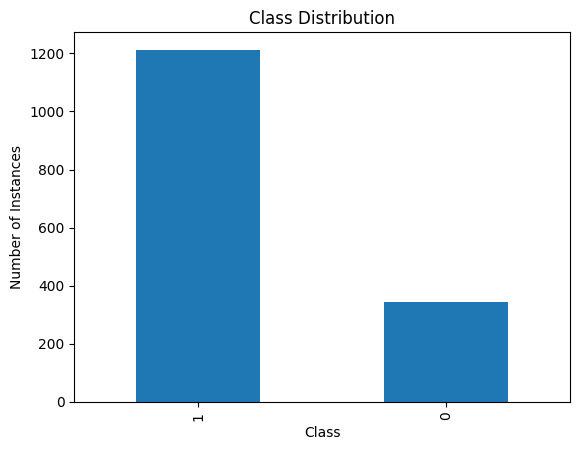

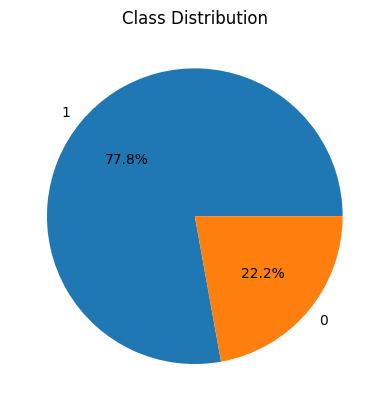

In [97]:
# Let's get count of 0 and 1 classes and build an Gist 
class_counts = data['isAlive'].value_counts()

class_counts.plot(kind='bar', title='Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Instances')
plt.show()

class_counts.plot(kind='pie', autopct='%1.1f%%', title='Class Distribution')
plt.ylabel('')
plt.show()

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [98]:
# ...

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [99]:
# ...

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [100]:
X = data.drop('isAlive', axis=1)
y = data['isAlive']

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [103]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [104]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [105]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

C:\Users\urmasa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [106]:
models = {
    "AdaBoost": AdaBoostClassifier(),
    "RandomForest": RandomForestClassifier(),
    "GaussianProcess": GaussianProcessClassifier(),
    "GaussianNB": GaussianNB(),
    "KNeighbors": KNeighborsClassifier(),
    "SVC": SVC(),
    "DecisionTree": DecisionTreeClassifier()
}

y_pred_dict = {}

# Шаг 1. создание модели
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    # Шаг 2. Предсказание на тестовых данных
    y_pred = model.predict(X_test)

    # Шаг 3. Оценка точности модели
    y_pred_dict[model_name] = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {model_name}: {y_pred_dict[model_name]:.2f}\n")

Training AdaBoost...
Accuracy of AdaBoost: 0.80

Training RandomForest...
Accuracy of RandomForest: 0.80

Training GaussianProcess...
Accuracy of GaussianProcess: 0.82

Training GaussianNB...
Accuracy of GaussianNB: 0.78

Training KNeighbors...
Accuracy of KNeighbors: 0.72

Training SVC...
Accuracy of SVC: 0.80

Training DecisionTree...
Accuracy of DecisionTree: 0.81



## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [107]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8013


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [108]:
# Шаг 3. Предсказание на тестовых данных


# Шаг 4. Оценка предсказания по метрике accuracy
for mod, res in y_pred_dict.items():

    print(f"Accuracy for {mod} model is : %.4f" % res)

Accuracy for AdaBoost model is : 0.8045
Accuracy for RandomForest model is : 0.8013
Accuracy for GaussianProcess model is : 0.8205
Accuracy for GaussianNB model is : 0.7756
Accuracy for KNeighbors model is : 0.7179
Accuracy for SVC model is : 0.8045
Accuracy for DecisionTree model is : 0.8077


Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [109]:
print()

In [110]:
# !gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

In [112]:
submission = pd.read_csv("./content/submission.csv", index_col='S.No')

# Обучение модели RandomForest
model = DecisionTreeClassifier()
print("Training RandomForest...")
model.fit(X_train, y_train)


indices_to_predict = submission.index
X_test_subset = X_test.reindex(indices_to_predict)
y_pred = model.predict(X_test_subset)

submission.loc[indices_to_predict, 'isAlive'] = y_pred

Training RandomForest...


In [113]:
submission.head(5)
print(submission['isAlive'].value_counts())

isAlive
1    389
Name: count, dtype: int64


Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:


submission.to_csv("./content/new_submission.csv", index=False)
print(submission)

      isAlive
S.No         
1558        0
1559        0
1560        0
1561        0
1562        0
...       ...
1942        0
1943        0
1944        0
1945        0
1946        0

[389 rows x 1 columns]
